Importing required libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

Loading the Data

In [2]:
# from google.colab import files
# uploaded = files.upload()

Saving netflix_stock.csv to netflix_stock.csv


In [2]:
df = pd.read_csv('data/netflix_stock.csv')

Data description

In [6]:
print(df.shape)
print(df.columns)

(1009, 7)
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date          object
Open         floa

Plotting the dataset

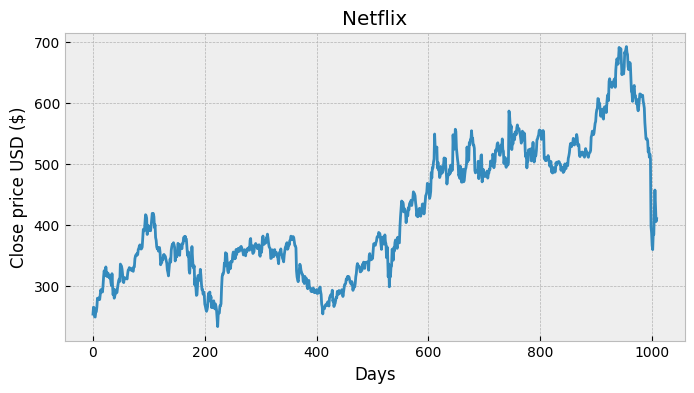

In [7]:
plt.figure(figsize=(8,4))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.show()

Data checks to perform

In [8]:
# check missing value

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# check duplicates

df.duplicated().sum()

0

In [10]:
# check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
# checking number of unique values of each column

df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

In [12]:
# check statistics of data

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df = df[['Close']]
df.head(5)

In [ ]:
future_days = 100
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

In [ ]:
x = np.array(df.drop(['Prediction'], 1))[ : -future_days]
# print(x)

In [ ]:
y = np.array(df['Prediction'])[ : -future_days]
# print(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df.drop(['Prediction'], 1)[ : -future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

In [ ]:
# Saving the model

import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(tree)

# Load the pickled model
tree_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
tree_from_pickle.predict(x_test)


In [ ]:
predictions = tree_prediction

valid = df[x.shape[0] : ]
valid['Predictions'] = predictions
plt.figure(figsize = (12, 6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.show()

In [ ]:
predictions = lr_prediction

valid = df[x.shape[0] : ]
valid['Predictions'] = predictions
plt.figure(figsize = (12, 6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier


In [ ]:
y_pred = tree.predict(x_test)
print("Mean squared error for Decision tree regressor : ", mean_squared_error(y_test, y_pred))
score = r2_score(y_test, y_pred)
print("Accuracy of model using decision tree regressor (r2) : ", score*100)
score = mean_absolute_error(y_test, y_pred)
print("Accuracy of model using decision tree regressor (mean_absolute) : ", score)


In [ ]:
y_pred = lr.predict(x_test)
print("Accuracy for linear regression : ", mean_squared_error(y_test, y_pred))
score = r2_score(y_test, y_pred)
print("Accuracy of model using linear regression : ", score*100)

Implementing SVM algorithm for model

In [ ]:
from sklearn.svm import SVC
from sklearn import preprocessing

svm = SVC()
lab_enc = preprocessing.LabelEncoder()
y_train_enc = lab_enc.fit_transform(y_train)
svm_model = svm.fit(x_train, y_train_enc)

In [ ]:
# predictions = svm.predict(x_test)
# print(accuracy_score(y_test, predictions))

svm_predictions = svm_model.predict(x_future)
predictions = svm_predictions

valid = df[x.shape[0] : ]
valid['Predictions'] = predictions
plt.figure(figsize = (12, 6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.show()

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train_enc)
predictions = model.predict(x_test)
# accuracy_score(y_test, predictions)
print(y_test)
print(predictions)

mean_squared_error(y_test, predictions)

In [ ]:
decision_tree = model.predict(x_future)
predictions = decision_tree

valid = df[x.shape[0] : ]
valid['Predictions'] = predictions
plt.figure(figsize = (12, 6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.show()

In [ ]:
# Implementing Random forest

from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
clf = RandomForestClassifier()

clf.fit(x_train, y_train_enc)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test, y_pred)

# print('Accuracy:', accuracy)

In [ ]:
random_forest = clf.predict(x_future)
predictions = random_forest

valid = df[x.shape[0] : ]
valid['Predictions'] = predictions
plt.figure(figsize = (12, 6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Val', 'Pred'])
plt.show()

In [ ]:
# Saving the model

import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(tree)

# Load the pickled model
tree_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
tree_from_pickle.predict(x_test)
